In [22]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job

backend = Aer.get_backend('statevector_simulator')

In [23]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram


import matplotlib.pyplot as plt 
import numpy as np 
from IPython.display import display, clear_output

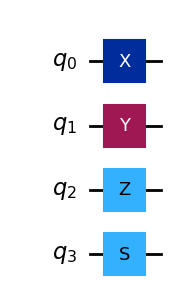

In [24]:
qc1 = QuantumCircuit(4)

# perform gate operations on individual qubits
qc1.x(0)
qc1.y(1)
qc1.z(2)
qc1.s(3)

# Draw circuit
qc1.draw('mpl')

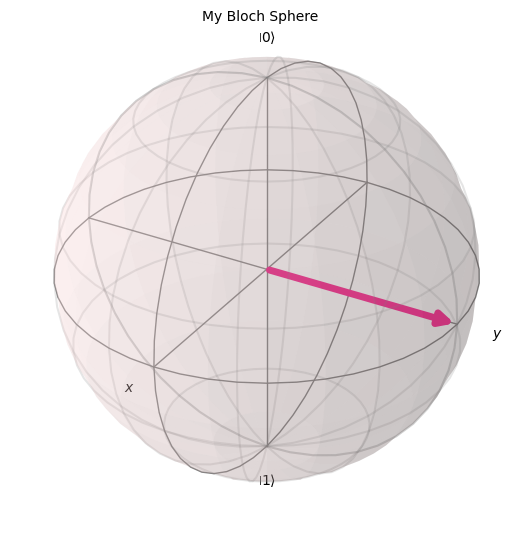

In [25]:
# Plot blochshere
from qiskit.visualization import plot_bloch_vector
 
plot_bloch_vector([0,1,0], title="My Bloch Sphere")


Total count for 00 and 11 are: {'00': 1000}


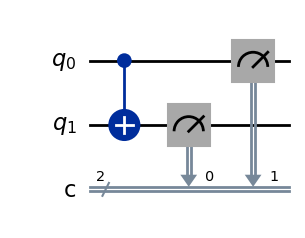

In [26]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, circuit_drawer


# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
# circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
zero_ket = [0,1]
one_ket = [1,0]
circuit.measure(one_ket, zero_ket)

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, backend)

# Execute the circuit on the qasm simulator
job = backend.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw('mpl')


Total count for 00 and 11 are: {'01': 1000}


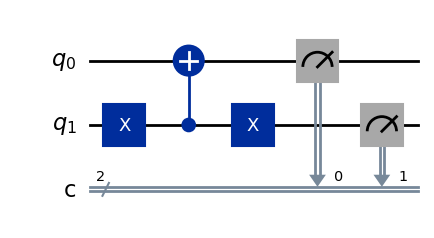

In [27]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a X gate on qubit 1
circuit.x(1)

# Add a CX (CNOT) gate on control qubit 1 and target qubit 0
circuit.cx(1, 0)

# Add a X gate on qubit 1
circuit.x(1)

# Map the quantum measurement to the classical bits
zero_ket = [0,1]
one_ket = [1,0]
circuit.measure(zero_ket, zero_ket)

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, backend)

# Execute the circuit on the qasm simulator
job = backend.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw('mpl')

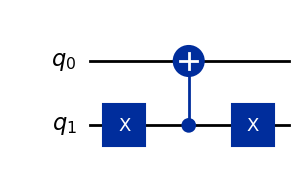

In [28]:
import numpy as np

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Add gates to the circuit
qc.x(1)
qc.cx(1, 0)
qc.x(1)

# Run the circuit using the unitary simulator
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
qc.draw('mpl')

In [29]:
# Extract the unitary matrix
unitary_matrix = result.get_unitary(qc, decimals=3)
print(unitary_matrix)

Operator([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
